<a href="https://colab.research.google.com/github/CyberIngeniero/rl_project_mia3/blob/main/MountainCar_RL_Project_End.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Inicialización del entorno
env = gym.make('MountainCar-v0', new_step_api=True)
env.reset()

array([-0.43086502,  0.        ], dtype=float32)

In [ ]:
# Inicialización de la tabla Q

# Para manejar el espacio de estados continuos, los discretizamos en 20x20 bloques.
num_states = (env.observation_space.high - env.observation_space.low)*np.array([10, 100])
num_states = np.round(num_states, 0).astype(int) + 1

# Inicializamos la tabla Q con ceros
Q = np.zeros(shape=(num_states[0], num_states[1], env.action_space.n))

In [ ]:
Q.shape

(19, 15, 3)

In [ ]:
# Definimos los parámetros del algoritmo
num_episodes = 5000
max_steps_per_episode = 1000
learning_rate = 0.1
discount_rate = 0.95
exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.001

In [ ]:
# Función para discretizar los estados
def discretize_state(state):
    discrete_state = (state - env.observation_space.low)*np.array([10, 100])
    return tuple(discrete_state.astype(int))

In [ ]:
# Define la función get_policy
def get_policy(Q):
    return np.argmax(Q, axis=2)

In [ ]:
# Lista para guardar las recompensas totales de cada episodio
rewards_all_episodes = []

# Listas para almacenar la longitud de los episodios y las tasas de exploración
episodes_lengths = []
exploration_rates = []

In [ ]:
# política inicial
initial_policy = get_policy(Q)

for episode in range(num_episodes):
    # Inicializar el estado inicial
    discrete_state = discretize_state(env.reset())

    done = False
    rewards_current_episode = 0
    episode_length = 0

    for step in range(max_steps_per_episode):
        # Render the environment
        # env.render()

        # Elegir acción
        exploration_rate_threshold = np.random.uniform(0, 1)
        if exploration_rate_threshold > exploration_rate:
            action = np.argmax(Q[discrete_state])
        else:
            action = env.action_space.sample()

        # Ejecutar acción
        new_state, reward, done, truncate, info = env.step(action)

        # Discretizar el nuevo estado
        new_discrete_state = discretize_state(new_state)

        # Actualizar la tabla Q
        if done and new_state[0] >= 0.5:
            Q[discrete_state + (action,)] = reward
        else:
            Q[discrete_state + (action,)] = (1 - learning_rate)*Q[discrete_state + (action,)] + learning_rate * (reward + discount_rate * np.max(Q[new_discrete_state]))

        # Transición al nuevo estado
        discrete_state = new_discrete_state

        rewards_current_episode += reward
        episode_length += 1

        if done:
          # print(f"Episode {episode} finished at step {step}")
          break
        elif truncate:
          # print(f"Episode {episode} truncated at step {step}")
          break

    # política final después de todos los episodios
    final_policy = get_policy(Q)

    # close the environment
    # env.close()

    # Decaimiento de la tasa de exploración
    exploration_rate = min_exploration_rate + \
        (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)

    # Guardar la recompensa total de este episodio
    rewards_all_episodes.append(rewards_current_episode)
    episodes_lengths.append(episode_length)
    exploration_rates.append(exploration_rate)

In [ ]:
# Calcular y mostrar la recompensa promedio de todos los episodios
count = 1000
rewards_per_thousand_episodes = np.split(np.array(rewards_all_episodes), num_episodes/count)


In [ ]:
print("********Promedio de recompensa por mil episodios********\n")
count0 = count
for r in rewards_per_thousand_episodes:
    print(count0, ": ", str(round(sum(r/count), 4)))
    count0 += 1000

********Promedio de recompensa por mil episodios********

1000 :  -200.0
2000 :  -198.478
3000 :  -184.632
4000 :  -179.113
5000 :  -162.523


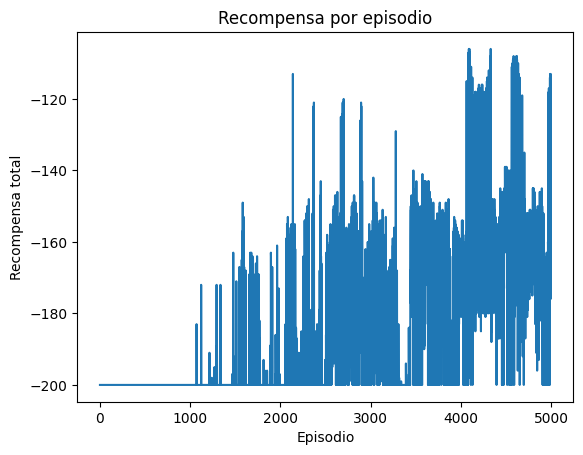

In [ ]:
# Recompensa total por episodio
plt.plot(rewards_all_episodes)
plt.title('Recompensa por episodio')
plt.xlabel('Episodio')
plt.ylabel('Recompensa total')
plt.show();

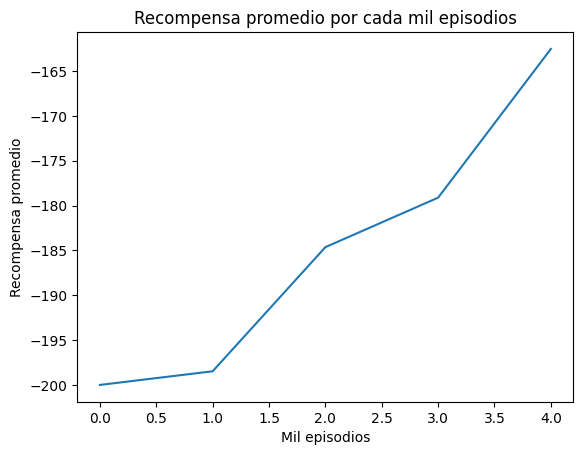

In [ ]:
# Recompensa promedio por cada mil episodios
rewards_per_thousand_episodes = np.array(rewards_all_episodes).reshape(num_episodes//1000, 1000).mean(axis=1)
plt.plot(rewards_per_thousand_episodes)
plt.title('Recompensa promedio por cada mil episodios')
plt.xlabel('Mil episodios')
plt.ylabel('Recompensa promedio')
plt.show();

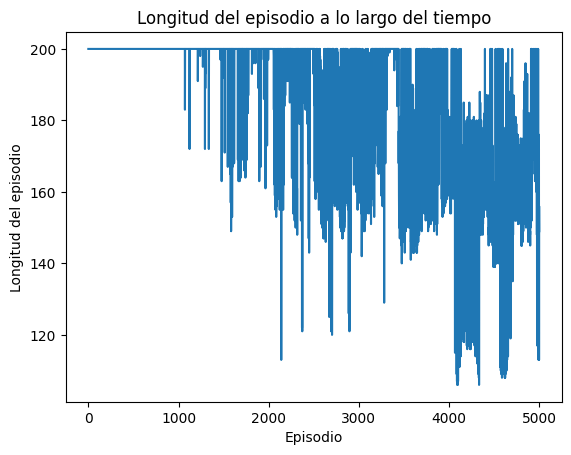

In [ ]:
# Crear un gráfico de la longitud del episodio a lo largo del tiempo
plt.plot(episodes_lengths)
plt.title('Longitud del episodio a lo largo del tiempo')
plt.xlabel('Episodio')
plt.ylabel('Longitud del episodio')
plt.show();

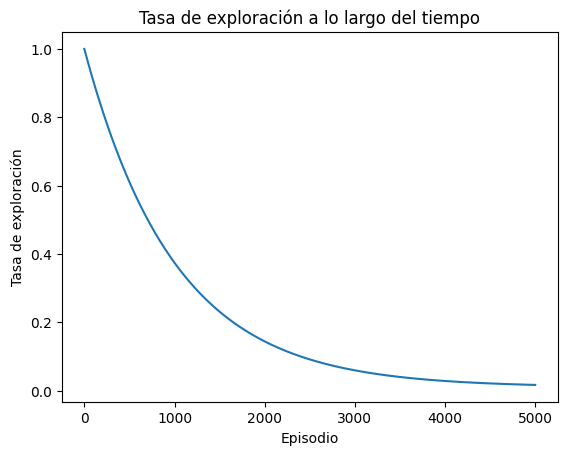

In [ ]:
# Crear un gráfico de la tasa de exploración a lo largo del tiempo
plt.plot(exploration_rates)
plt.title('Tasa de exploración a lo largo del tiempo')
plt.xlabel('Episodio')
plt.ylabel('Tasa de exploración')
plt.show();

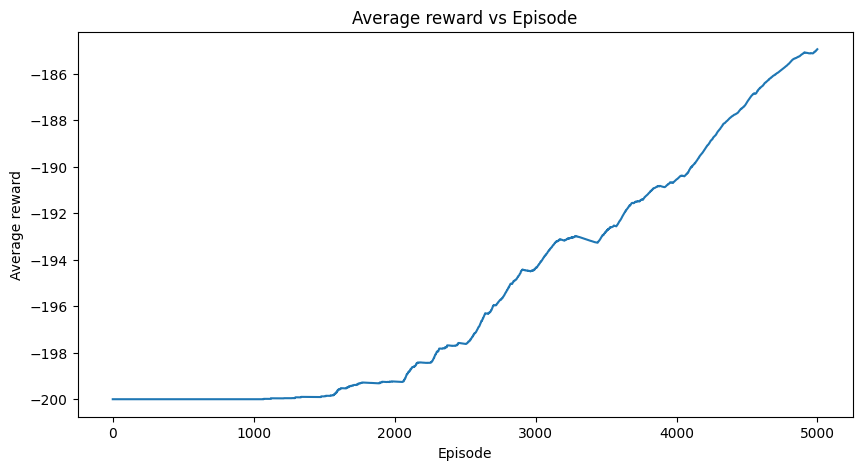

In [ ]:
# Asume que `rewards_all_episodes` es una lista de recompensas obtenidas por episodio.
cumulative_rewards = np.cumsum(rewards_all_episodes)
average_rewards_efficient = cumulative_rewards / (np.arange(len(rewards_all_episodes)) + 1)

plt.figure(figsize=(10,5))
plt.plot(average_rewards_efficient)
plt.title('Average reward vs Episode')
plt.xlabel('Episode')
plt.ylabel('Average reward')
plt.show();

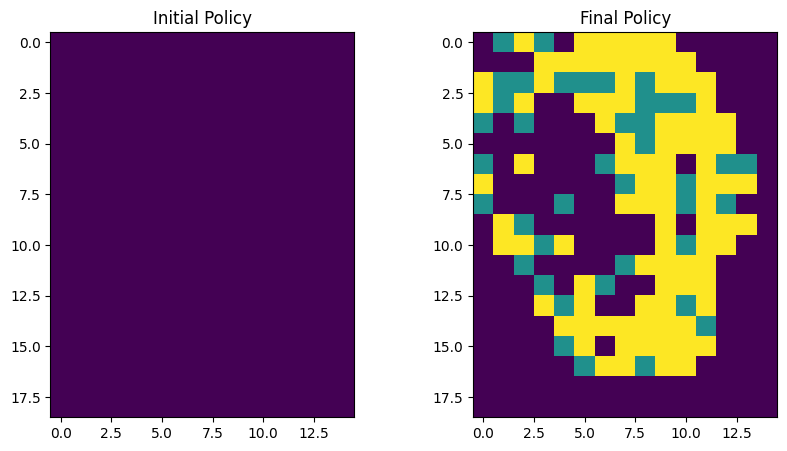

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(initial_policy)
plt.title('Initial Policy')

plt.subplot(1, 2, 2)
plt.imshow(final_policy)
plt.title('Final Policy')
plt.show();

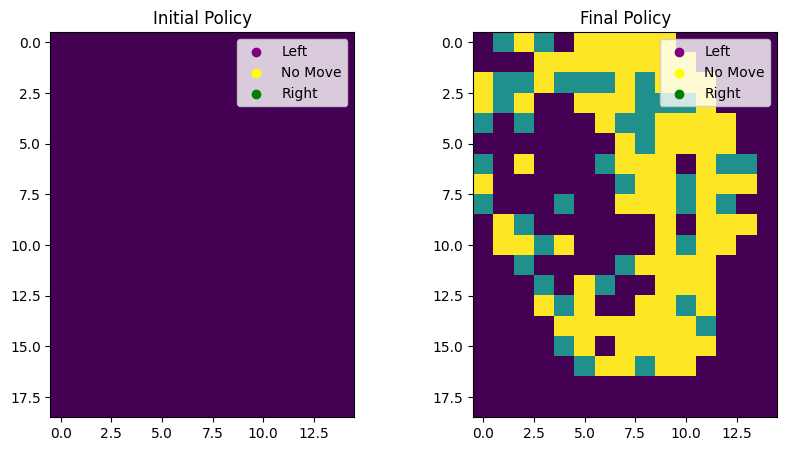

In [ ]:
# Define the colors and actions
colors = ['purple', 'yellow', 'green']
actions = ['Left', 'No Move', 'Right']

plt.figure(figsize=(10, 5))

# Plot initial policy
plt.subplot(1, 2, 1)
plt.imshow(initial_policy)
plt.title('Initial Policy')
for color, action in zip(colors, actions):
    plt.scatter([], [], c=color, label=action)
plt.legend()

# Plot final policy
plt.subplot(1, 2, 2)
plt.imshow(final_policy)
plt.title('Final Policy')
for color, action in zip(colors, actions):
    plt.scatter([], [], c=color, label=action)
plt.legend()

plt.show()